In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Task 1

In [4]:
# Create a graph
G = nx.Graph()

In [7]:
# Define stations (nodes) and their connections (edges with real distances in kilometers)
stations = {
    'Hyde Park Corner': {'Green Park': 0.1},
    'Green Park': {'Piccadilly Circus': 0.8},
    'Piccadilly Circus': {'Leicester Square': 0.6},
    'Leicester Square': {'Covent Garden': 0.6},
    'Covent Garden': {'Holborn': 1.5}
}

# Add edges to the graph with distances as weights
for station, connections in stations.items():
    for connected_station, distance in connections.items():
        G.add_edge(station, connected_station, weight=distance)

# Define positions of nodes for better visualization
pos = {
    'Hyde Park Corner': (-1, 0),
    'Green Park': (0, 1),
    'Piccadilly Circus': (1, 1),
    'Leicester Square': (2, 1),
    'Covent Garden': (3, 2),
    'Holborn': (4, 3)
}

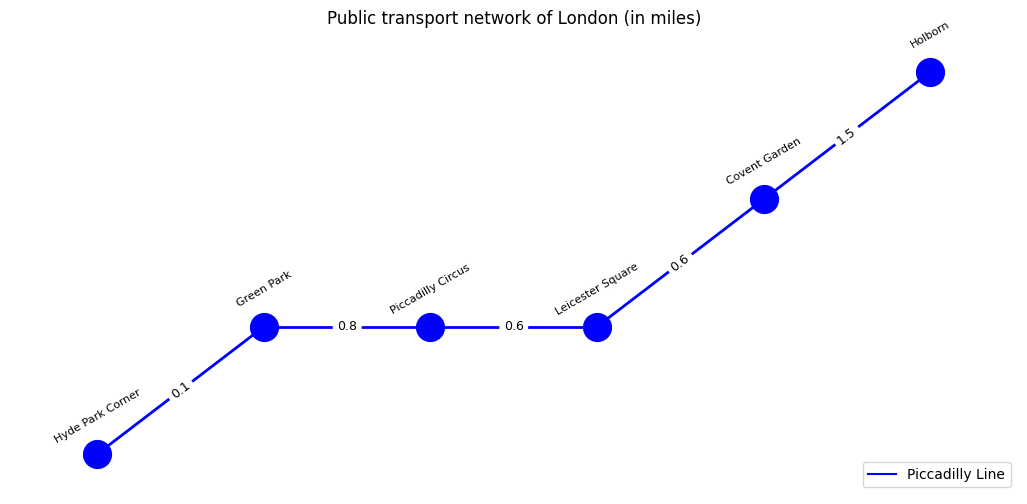

In [8]:
# Draw the graph
plt.figure(figsize=(13, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='blue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, edge_color='blue')

# Custom function to place labels with rotation
def draw_rotated_labels(pos, labels, ax):
    # Define rotation angles for the labels, adjust this for aesthetic purposes
    angles = {
        'Hyde Park Corner': 30,
        'Green Park': 30,
        'Piccadilly Circus': 30,
        'Leicester Square': 30,
        'Covent Garden': 30,
        'Holborn': 30
    }

    for station, position in pos.items():
        x, y = position
        ax.text(x, y + 0.3, station, fontsize=8, ha='center', va='center',
                rotation=angles[station], rotation_mode='anchor')

# Draw edge labels (distances between stations)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Get current axis and use it to add rotated labels
ax = plt.gca()
draw_rotated_labels(pos, G.nodes, ax)

# Add a title and display the plot
plt.title("Public transport network of London (in miles)")
plt.plot([], [], color='blue', label='Piccadilly Line')
plt.legend(loc='lower right')
plt.axis('off')  # Hide axis
plt.show()


## Task 2